In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
train = pd.read_csv('C:/Users/Dikshant Gupta/Desktop/VIT/SEM 6/CSE3020_DV_Prj_NIL/data/train_data_cleaning2.csv')
test  = pd.read_csv('C:/Users/Dikshant Gupta/Desktop/VIT/SEM 6/CSE3020_DV_Prj_NIL/data/test_data_cleaning2.csv')

In [3]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [4]:
print(train.shape)

(7613, 5)


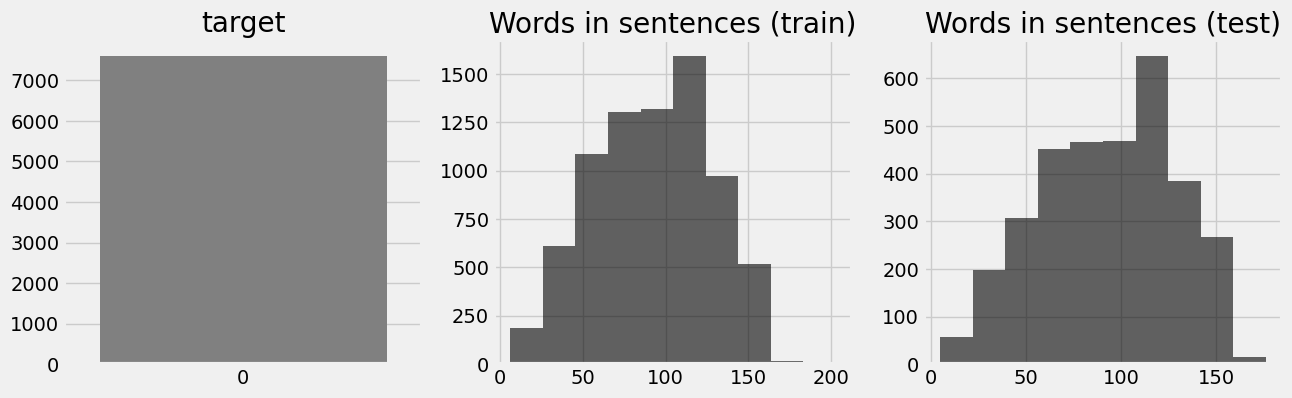

In [5]:
plt.subplots(1,3,figsize=(14,4))
plt.subplot(1,3,1); sns.countplot(train['target'], palette='gray', alpha=1.0); plt.xlabel(''), plt.ylabel(''); plt.title('target')
plt.subplot(1,3,2); plt.hist(train['text'].str.len(), color='black', alpha=0.6); plt.ylabel(''); plt.title('Words in sentences (train)')
plt.subplot(1,3,3); plt.hist(test['text'].str.len(), color='black', alpha=0.6); plt.ylabel(''); plt.title('Words in sentences (test)')
plt.show()

In [6]:
for i in range(50):
    print(train['text'][i])

Our Deeds are the Reason of this  # earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask .  Canada
All residents asked to  ' shelter in place '  are being notified by officers .  No other evacuation or shelter in place orders are expected
13,000 people receive  # wildfires evacuation orders in California 
Just got sent this photo from Ruby  # Alaska as smoke from  # wildfires pours into a school 
 # Rocky Fire Update  =  >  California Hwy .  20 closed in both directions due to Lake County fire  -   # CAfire  # wildfires
 # flood  # disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I am on top of the hill and I can see a fire in the woods . 
There is an emergency evacuation happening now in the building across the street
I am afraid that the tornado is coming to our area . 
Three people died from the heat wave so far
Haha South Tampa is getting flooded hah -  WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVC

# Text Cleaning & Preprocessing

In [7]:
import re
import string

In [8]:
def remove_URL(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r' httpsmark ', text)


def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)


def remove_atsymbol(text):
    name = re.compile(r'@\S+')
    return name.sub(r' atsymbol ', text)


def remove_hashtag(text):
    hashtag = re.compile(r'#')
    return hashtag.sub(r' hashtag ', text)


def remove_exclamation(text):
    exclamation = re.compile(r'!')
    return exclamation.sub(r' exclamation ', text)

def remove_question(text):
    question = re.compile(r'?')
    return question.sub(r' question ', text)


def remove_punc(text):
    return text.translate(str.maketrans('','',string.punctuation))


def remove_number(text):
    number = re.compile(r'\d+')
    return number.sub(r' number ', text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' emoji ', string)

In [9]:
train['text'] = train['text'].str.lower()
train['text'] = train['text'].apply(lambda text: remove_URL(text))
train['text'] = train['text'].apply(lambda text: remove_html(text))
train['text'] = train['text'].apply(lambda text: remove_atsymbol(text))
train['text'] = train['text'].apply(lambda text: remove_hashtag(text))
train['text'] = train['text'].apply(lambda text: remove_exclamation(text))
train['text'] = train['text'].apply(lambda text: remove_punc(text))
train['text'] = train['text'].apply(lambda text: remove_number(text))
train['text'] = train['text'].apply(lambda text: remove_emoji(text))




test['text']  = test['text'].str.lower()
test['text']  = test['text'].apply(lambda text: remove_URL(text))
test['text']  = test['text'].apply(lambda text: remove_html(text))
test['text']  = test['text'].apply(lambda text: remove_atsymbol(text))
test['text']  = test['text'].apply(lambda text: remove_hashtag(text))
test['text']  = test['text'].apply(lambda text: remove_exclamation(text))
test['text']  = test['text'].apply(lambda text: remove_punc(text))
test['text']  = test['text'].apply(lambda text: remove_number(text))
test['text']  = test['text'].apply(lambda text: remove_emoji(text))

In [10]:
for i in range(50):
    print(test['text'][i])

just happened a terrible car crash
heard about   hashtag  earthquake is different cities stay safe everyone  
there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
apocalypse lighting     hashtag  spokane   hashtag  wildfires
typhoon soudelor kills  number  in china and taiwan
we are shaking  it is an earthquake
they  d probably still show more life than arsenal did yesterday eh   eh  
hey  exclamation   how are you  
what a nice hat  
fuck off  exclamation  
no i do not like cold  exclamation  
nooooooooo  exclamation   do not do that  exclamation  
no do not tell me that  exclamation  
what if    exclamation  
awesome  exclamation  
birmingham wholesale market is ablaze bbc news    fire breaks out at birmingham  s wholesale market 
  sunkxssedharry will you wear shorts for race ablaze   
  hashtag  previouslyondoyintv   toke makinwas marriage crisis sets nigerian twitter ablaze   
check these out         hashtag  nsfw
psa   im splitting my per

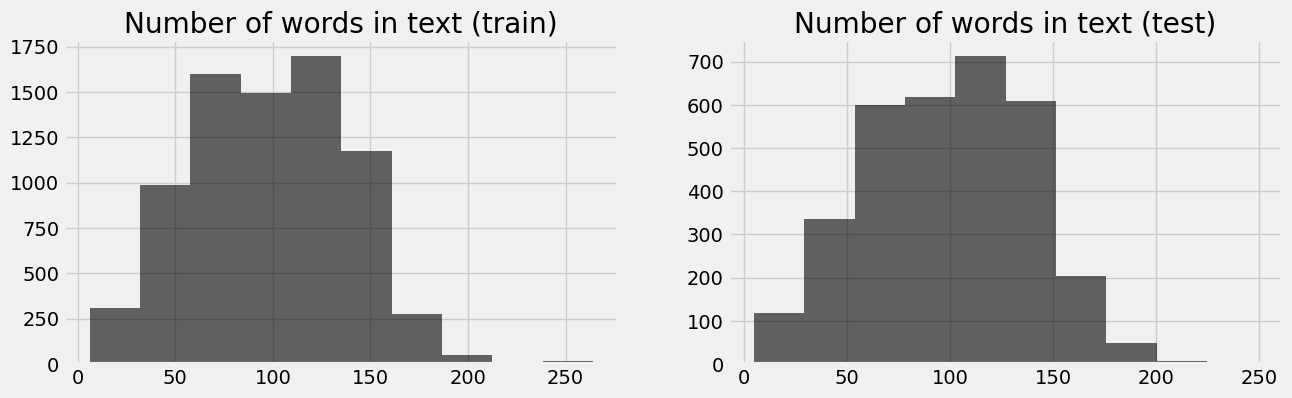

In [11]:
plt.subplots(1,2,figsize=(14,4))
plt.subplot(1,2,1); plt.hist(train['text'].str.len(), color='black', alpha=0.6); plt.ylabel(''); plt.title('Number of words in text (train)')
plt.subplot(1,2,2); plt.hist(test['text'].str.len(), color='black', alpha=0.6); plt.ylabel(''); plt.title('Number of words in text (test)')
plt.show()

In [12]:
TRAINING_SIZE = 6090
train_shuffle = train.sample(frac=1, random_state=0)


train = train_shuffle[0:TRAINING_SIZE]
valid = train_shuffle[TRAINING_SIZE:]

# BERT Model Training & Testing

In [14]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [15]:
class Data(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = data
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        text = self.data['text'].values[idx]
        label = self.data['target'].values[idx]
        return text, torch.tensor(label, dtype=torch.float)
    
    
    
class TestData(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = data
    def __len__(self):
        return self.data.shape[0]
    def __getitem__(self, idx):
        text = self.data['text'].values[idx]
        return text

In [16]:
train_ds = Data(train)
valid_ds = Data(valid)
test_ds  = TestData(test)



print(train_ds[0])
print('-'*85)
print(train_ds[0][0])
print('-'*85)
print(train_ds[0][1])

('  katiekatcubs you already know how this shit goes   world series or armageddon  ', tensor(0.))
-------------------------------------------------------------------------------------
  katiekatcubs you already know how this shit goes   world series or armageddon  
-------------------------------------------------------------------------------------
tensor(0.)


In [17]:
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True, drop_last=False)
valid_dl = DataLoader(valid_ds, batch_size=16*2, shuffle=True, drop_last=False)
test_dl  = DataLoader(test_ds, batch_size=16, shuffle=False, drop_last=False)



batch = next(iter(train_dl))
print(len(batch[0]))

16


In [18]:
# tokenizer

#!pip install transformers -q
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [19]:
for text in train['text'].values:
    encoded = tokenizer.encode_plus(text.lower())
    
print(encoded)

{'input_ids': [101, 2026, 2567, 1050, 2375, 5673, 9541, 9541, 2015, 2288, 1996, 2655, 2000, 2132, 2039, 2167, 1998, 2954, 1996, 3748, 8769, 12043, 2015, 1037, 6841, 2012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [20]:
decoded = tokenizer.decode(encoded['input_ids'])

print(decoded)

[CLS] my brother n law riooooos got the call to head up north and fight the wild fires dudes a beast at [SEP]


In [21]:
MAX_LEN = 50
encoded = tokenizer.encode_plus(text, padding='max_length', max_length=MAX_LEN, truncation=True)

In [22]:
from torch import nn
from transformers import AutoModel

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.bert = AutoModel.from_pretrained('bert-base-uncased')
        self.classifier = nn.Linear(in_features=768, out_features=2)
    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        pooler_output = outputs.pooler_output
        logits = self.classifier(pooler_output).squeeze(-1)
        return logits

In [24]:
model = Model()


optimizer = torch.optim.AdamW(model.parameters())
criterion = nn.CrossEntropyLoss()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
model.train()
train_loss=0

for batch in train_dl:
    optimizer.zero_grad()
    text = batch[0]
    label = batch[1].long()
    encoded = tokenizer.batch_encode_plus(
                  list(text),
                  padding='max_length',
                  max_length=MAX_LEN,
                  truncation=True,
                  return_tensors='pt',
                  return_attention_mask=True,  
                  return_token_type_ids=True)
    input_ids=encoded['input_ids']
    attention_mask=encoded['attention_mask']
    token_type_ids=encoded['token_type_ids']
    preds=model(input_ids, attention_mask, token_type_ids)
    loss=criterion(preds, label)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
train_loss/=len(train_dl)
print(train_loss)

0.7238583966815878


In [28]:
model.eval()
valid_loss=0

with torch.no_grad():
    for batch in valid_dl:
        optimizer.zero_grad()
        text = batch[0]
        label = batch[1].long()
        encoded = tokenizer.batch_encode_plus(
                      list(text),
                      padding='max_length',
                      max_length=MAX_LEN,
                      truncation=True,
                      return_tensors='pt',
                      return_attention_mask=True,  
                      return_token_type_ids=True)
        input_ids=encoded['input_ids']
        attention_mask=encoded['attention_mask']
        token_type_ids=encoded['token_type_ids']
        preds=model(input_ids, attention_mask, token_type_ids)
        loss=criterion(preds, label)
        valid_loss += loss.item()
    valid_loss/=len(valid_dl)
print(valid_loss)

0.749503197769324


In [29]:
model = Model()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)
criterion = nn.CrossEntropyLoss()



best_loss=np.inf
for epoch in range(5):
    model.train()
    train_loss=0
    for batch in train_dl:
        optimizer.zero_grad()
        text = batch[0]
        label = batch[1].long()
        encoded = tokenizer.batch_encode_plus(
                      list(text),
                      padding='max_length',
                      max_length=MAX_LEN,
                      truncation=True,
                      return_tensors='pt',
                      return_attention_mask=True,  
                      return_token_type_ids=True)
        input_ids=encoded['input_ids']
        attention_mask=encoded['attention_mask']
        token_type_ids=encoded['token_type_ids']
        preds=model(input_ids, attention_mask, token_type_ids)
        loss=criterion(preds, label)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss/=len(train_dl)
    
    model.eval()
    valid_loss=0
    with torch.no_grad():
        for batch in valid_dl:
            optimizer.zero_grad()
            text = batch[0]
            label = batch[1].long()
            encoded = tokenizer.batch_encode_plus(
                          list(text),
                          padding='max_length',
                          max_length=MAX_LEN,
                          truncation=True,
                          return_tensors='pt',
                          return_attention_mask=True,  
                          return_token_type_ids=True)
            input_ids=encoded['input_ids']
            attention_mask=encoded['attention_mask']
            token_type_ids=encoded['token_type_ids']
            preds=model(input_ids, attention_mask, token_type_ids)
            loss=criterion(preds, label)
            valid_loss+=loss.item()
        valid_loss/=len(valid_dl)
        
    print(f"EPOCH[{epoch}]")
    print(train_loss)
    print(valid_loss)
    if valid_loss<best_loss:
        best_loss=valid_loss
        torch.save(model.state_dict(), "bert.pth")
        print('saved.....')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EPOCH[0]
0.45401865013158854
0.3938412123049299
saved.....
EPOCH[1]
0.34268918541550947
0.3965646370003621
EPOCH[2]
0.27604451047114814
0.44289279434209067
EPOCH[3]
0.21369074335385338
0.5158418935413162
EPOCH[4]
0.16538234078019778
0.5421073169757923


In [30]:
model.load_state_dict(torch.load("bert.pth", map_location="cpu"))
model.eval()
pred_valid = []
with torch.no_grad():
    for batch in valid_dl:
        optimizer.zero_grad()
        text = batch[0]
        encoded = tokenizer.batch_encode_plus(
                      list(text),
                      padding='max_length',
                      max_length=MAX_LEN,
                      truncation=True,
                      return_tensors='pt',
                      return_attention_mask=True,  
                      return_token_type_ids=True)
        input_ids = encoded['input_ids']
        attention_mask = encoded['attention_mask']
        token_type_ids = encoded['token_type_ids']
        preds = model(input_ids, attention_mask, token_type_ids)
        pred_valid.append(preds.cpu().numpy())
pred_valid = np.concatenate(pred_valid, axis=0)

In [31]:
pred_valid.argmax(axis=1)

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(valid['target'], pred_valid.argmax(axis=1))
print(acc)

0.4983585029546947
